# Breast Cancer Image Classification Using CNN

## Importing libraries

In [1]:
import tensorflow as tf
import pandas as pd 
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt 
import pathlib 
import random

In [2]:
path = 'C:/Users/PRATHAM/Downloads//Dataset_BUSI_with_GT/'
data_dir = pathlib.Path(path)

In [3]:
benignPath = os.path.join(data_dir,'bening')
malignantPath = os.path.join(data_dir,'malignant')
normalPath = os.path.join(data_dir,'normal')

## Building the CNN

In [4]:
batch_size = 32
img_height = 224
img_width = 224

**Separating data sets**

In [5]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory( data_dir, validation_split=0.2, subset="training",seed=123,image_size=(img_height, img_width), batch_size=batch_size)

Found 1578 files belonging to 3 classes.
Using 1263 files for training.


In [6]:
val_data = image_dataset_from_directory(data_dir,validation_split=0.2,subset="validation",seed=123,image_size=(img_height,img_width),batch_size=batch_size)

Found 1578 files belonging to 3 classes.
Using 315 files for validation.


# Defining the Model

In [7]:
from tensorflow.keras import layers 
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3,activation="softmax")
])

# Compiling the Model

In [8]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

In [9]:
epochs = 20
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)

Epoch 1/20


C:\Users\PRATHAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


40/40 [==============================] - 27s 667ms/step - loss: 0.9205 - accuracy: 0.5717 - val_loss: 0.7671 - val_accuracy: 0.6857
Epoch 2/20
40/40 [==============================] - 28s 685ms/step - loss: 0.6842 - accuracy: 0.7015 - val_loss: 0.7106 - val_accuracy: 0.6762
Epoch 3/20
40/40 [==============================] - 28s 683ms/step - loss: 0.5539 - accuracy: 0.7561 - val_loss: 0.7296 - val_accuracy: 0.6889
Epoch 4/20
40/40 [==============================] - 28s 683ms/step - loss: 0.4368 - accuracy: 0.8108 - val_loss: 0.7543 - val_accuracy: 0.7175
Epoch 5/20
40/40 [==============================] - 28s 691ms/step - loss: 0.3488 - accuracy: 0.8504 - val_loss: 0.8048 - val_accuracy: 0.7333
Epoch 6/20
40/40 [==============================] - 28s 684ms/step - loss: 0.2775 - accuracy: 0.8876 - val_loss: 1.0333 - val_accuracy: 0.7778
Epoch 7/20
40/40 [==============================] - 28s 692ms/step - loss: 0.2277 - accuracy: 0.9177 - val_loss: 0.9369 - val_accuracy: 0.7778
Epoch 8/20

**Keys**

In [10]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Accuracy vs Loss

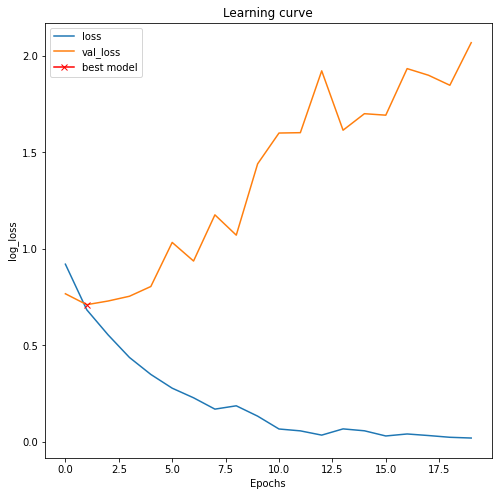

In [11]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot( np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

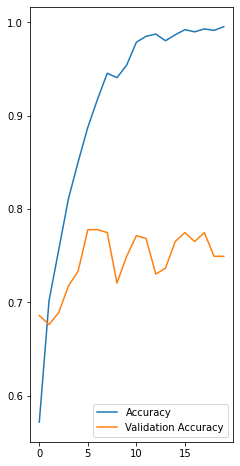

In [12]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()
plt.show()

In [13]:
model.evaluate(val_data)

10/10 [==============================] - 2s 161ms/step - loss: 2.0691 - accuracy: 0.7492


[2.069089412689209, 0.7492063641548157]

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1